In [1]:
require "narray"
require "daru"
require "gnuplotrb"
include Daru
include GnuplotRB
include Fit
nil

"if(window['d3'] === undefined ||\n   window['Nyaplot'] === undefined){\n    var path = {\"d3\":\"https://cdnjs.cloudflare.com/ajax/libs/d3/3.5.5/d3.min\",\"downloadable\":\"http://cdn.rawgit.com/domitry/d3-downloadable/master/d3-downloadable\"};\n\n\n\n    var shim = {\"d3\":{\"exports\":\"d3\"},\"downloadable\":{\"exports\":\"downloadable\"}};\n\n    require.config({paths: path, shim:shim});\n\n\nrequire(['d3'], function(d3){window['d3']=d3;console.log('finished loading d3');require(['downloadable'], function(downloadable){window['downloadable']=downloadable;console.log('finished loading downloadable');\n\n\tvar script = d3.select(\"head\")\n\t    .append(\"script\")\n\t    .attr(\"src\", \"http://cdn.rawgit.com/domitry/Nyaplotjs/master/release/nyaplot.js\")\n\t    .attr(\"async\", true);\n\n\tscript[0][0].onload = script[0][0].onreadystatechange = function(){\n\n\n\t    var event = document.createEvent(\"HTMLEvents\");\n\t    event.initEvent(\"load_nyaplot\",false,false);\n\t    win

# Variables

In [2]:
prefix = "20160223_15_equil"

input_no2 = "../DOAS/#{prefix}_NO2.csv"
input_nox = "../DOAS/#{prefix}_NOx.csv"

nil

# Data preparation

In [3]:
no2 = DataFrame.from_csv(input_no2)
no2.vectors = Index.new(no2.vectors.to_a.map{|i| i.to_sym})
no2.head

,chocho,chocho_err,h2o,h2o_err,index,no2,no2_err,o3,o3_err,timestamp
0,0.000754158486135599,0.0974399528773963,502208.710730325,951822.486536096,0,0.0240656500974473,0.0664138514711382,-529.711139200708,1180.68713204252,2016-02-22T23:28:51+00:00
1,-0.0832155817669571,0.0928951835016917,-5129976.50628083,983363.072113954,1,0.018687990687318,0.0686615814150697,513.890138315761,1223.67330175804,2016-02-22T23:29:03+00:00
2,0.0493636781453117,0.0968900415924769,-3910746.59079417,1018399.13321686,2,0.00903773204973102,0.0710747698022142,124.674326397115,1266.07102569417,2016-02-22T23:29:14+00:00
3,-0.00356360746649188,0.0943941281644194,-3909427.9709014,993359.674194205,3,0.0175004264090888,0.0693281451173717,277.975291969594,1235.03761455552,2016-02-22T23:29:25+00:00
4,-0.0837965012829112,0.0892364190265691,-5026923.44323644,939414.683713054,4,0.036465299035188,0.0655635422792715,229.247614349786,1167.98901975735,2016-02-22T23:29:36+00:00
5,0.00568200331078076,0.0922750686377582,-5323459.28360742,976216.428955389,5,0.0685483167746478,0.068154089512446,-90.4494659303962,1214.58348695163,2016-02-22T23:29:48+00:00
6,0.13195718113953,0.0919106975593483,-5358585.51966023,970979.637205876,6,0.040570220283456,0.0677770797505255,546.45363905052,1207.71655443875,2016-02-22T23:29:59+00:00
7,0.0344386145402513,0.0910928177513945,-5024986.0722854,955205.405230213,8,0.358509234929199,0.0666619350457133,-39.0787275639688,1187.30668370071,2016-02-22T23:30:21+00:00
8,0.112221131587848,0.0961548835983969,-5357262.08380976,1012788.3299737,9,0.406164518800931,0.0706851822123344,118.956132174111,1259.28186876785,2016-02-22T23:30:32+00:00
9,-0.0539876243875621,0.0893494184888001,-4915876.99603479,933544.011683069,10,0.558599993696634,0.0652026134048534,511.389952444847,1160.13521603577,2016-02-22T23:30:44+00:00


In [4]:
nox = DataFrame.from_csv(input_nox)
nox.vectors = Index.new(nox.vectors.to_a.map{|i| i.to_sym})
nox.head

,chocho,chocho_err,h2o,h2o_err,index,no2,no2_err,o3,o3_err,timestamp
0,-0.0169477685314005,0.110468054408667,-3424917.55946658,1127074.43605448,59,7.1470048838478,0.0794350590597903,34.9046497229101,1399.18386315883,2016-02-22T23:40:04+00:00
1,-0.135868234771222,0.203061467480065,-3913043.72137433,2069464.33821953,60,22.8038163931056,0.149322658046917,2116.6497499978,2567.66907529406,2016-02-22T23:40:15+00:00
2,-0.214001627613451,0.198225826786815,-3333157.8911711,2019473.20152856,61,23.2847368333696,0.145826367578817,1520.99311245487,2505.5582078123,2016-02-22T23:40:25+00:00
3,-0.156769573422662,0.199699645909036,-3113375.43814995,2035466.02905323,62,23.1877676763722,0.146958846665094,2449.65055132061,2525.48059157272,2016-02-22T23:40:35+00:00
4,-0.252240059012755,0.201289973687046,-3975963.72028682,2051218.49863335,63,23.1398226038063,0.148084762159034,2371.13350310509,2544.99576247327,2016-02-22T23:40:46+00:00
5,-0.0728187518852138,0.203773601810745,-3937699.00997022,2077550.38183679,64,23.2002051982667,0.150000675114823,1405.62214890018,2577.69252731393,2016-02-22T23:40:56+00:00
6,-0.154850165163879,0.209790061092068,-2399618.6690036,2139335.83309715,65,23.22031377769,0.154466644223359,2281.02856032643,2654.37806266503,2016-02-22T23:41:06+00:00
7,-0.35106728177851,0.209756599224609,-4334021.74287067,2138232.10458502,66,23.1299519923121,0.154364638093022,1740.64731565874,2652.96479166582,2016-02-22T23:41:16+00:00
8,-0.119715618402425,0.200202151834877,-3699186.20399909,2040303.26207972,67,23.2992060964594,0.147334020172152,1809.26863437462,2531.46809903571,2016-02-22T23:41:27+00:00
9,-0.27768457184522,0.204016108702135,-2217971.05226083,2081453.27622686,68,23.295282010397,0.150305810061152,1561.93218145426,2582.58061153082,2016-02-22T23:41:37+00:00


In [5]:
ts = no2.concat(nox)
ts.sort([:timestamp])

,chocho,chocho_err,h2o,h2o_err,index,no2,no2_err,o3,o3_err,timestamp
0,0.000754158486135599,0.0974399528773963,502208.710730325,951822.486536096,0,0.0240656500974473,0.0664138514711382,-529.711139200708,1180.68713204252,2016-02-22T23:28:51+00:00
1,-0.0832155817669571,0.0928951835016917,-5129976.50628083,983363.072113954,1,0.018687990687318,0.0686615814150697,513.890138315761,1223.67330175804,2016-02-22T23:29:03+00:00
2,0.0493636781453117,0.0968900415924769,-3910746.59079417,1018399.13321686,2,0.00903773204973102,0.0710747698022142,124.674326397115,1266.07102569417,2016-02-22T23:29:14+00:00
3,-0.00356360746649188,0.0943941281644194,-3909427.9709014,993359.674194205,3,0.0175004264090888,0.0693281451173717,277.975291969594,1235.03761455552,2016-02-22T23:29:25+00:00
4,-0.0837965012829112,0.0892364190265691,-5026923.44323644,939414.683713054,4,0.036465299035188,0.0655635422792715,229.247614349786,1167.98901975735,2016-02-22T23:29:36+00:00
5,0.00568200331078076,0.0922750686377582,-5323459.28360742,976216.428955389,5,0.0685483167746478,0.068154089512446,-90.4494659303962,1214.58348695163,2016-02-22T23:29:48+00:00
6,0.13195718113953,0.0919106975593483,-5358585.51966023,970979.637205876,6,0.040570220283456,0.0677770797505255,546.45363905052,1207.71655443875,2016-02-22T23:29:59+00:00
7,0.0344386145402513,0.0910928177513945,-5024986.0722854,955205.405230213,8,0.358509234929199,0.0666619350457133,-39.0787275639688,1187.30668370071,2016-02-22T23:30:21+00:00
8,0.112221131587848,0.0961548835983969,-5357262.08380976,1012788.3299737,9,0.406164518800931,0.0706851822123344,118.956132174111,1259.28186876785,2016-02-22T23:30:32+00:00
9,-0.0539876243875621,0.0893494184888001,-4915876.99603479,933544.011683069,10,0.558599993696634,0.0652026134048534,511.389952444847,1160.13521603577,2016-02-22T23:30:44+00:00


In [6]:
ts[:timestamp].head

#<Daru::Vector:21826100 @name = nil @size = 10 >
                                      nil
                   0 2016-02-22T23:28:51+
                   1 2016-02-22T23:29:03+
                   2 2016-02-22T23:29:14+
                   3 2016-02-22T23:29:25+
                   4 2016-02-22T23:29:36+
                   5 2016-02-22T23:29:48+
                   6 2016-02-22T23:29:59+
                   7 2016-02-22T23:30:21+
                   8 2016-02-22T23:30:32+
                   9 2016-02-22T23:30:44+

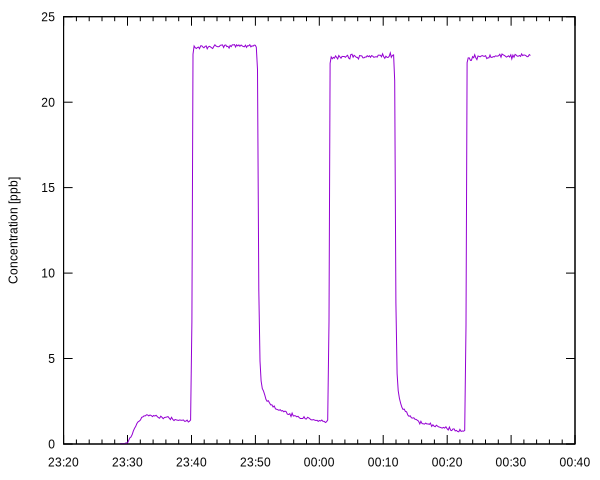

In [7]:
ts.index = DateTimeIndex.new(ts[:timestamp])

Plot.new(
  [ts[:no2], with: "lines", title: ""],
  format_x: "%H:%M",
  ylabel: "Concentration [ppb]")

In [8]:
offset = ts[:timestamp].first

ts[:s] = ts[:timestamp].collect do |t|
  (t - offset).to_f*24*60*60
end
ts.head

,chocho,chocho_err,h2o,h2o_err,index,no2,no2_err,o3,o3_err,timestamp,s
2016-02-22T23:28:51+00:00,0.000754158486135599,0.0974399528773963,502208.710730325,951822.486536096,0,0.0240656500974473,0.0664138514711382,-529.711139200708,1180.68713204252,2016-02-22T23:28:51+00:00,0.0
2016-02-22T23:29:03+00:00,-0.0832155817669571,0.0928951835016917,-5129976.50628083,983363.072113954,1,0.018687990687318,0.0686615814150697,513.890138315761,1223.67330175804,2016-02-22T23:29:03+00:00,11.999999999999998
2016-02-22T23:29:14+00:00,0.0493636781453117,0.0968900415924769,-3910746.59079417,1018399.13321686,2,0.00903773204973102,0.0710747698022142,124.674326397115,1266.07102569417,2016-02-22T23:29:14+00:00,23.0
2016-02-22T23:29:25+00:00,-0.00356360746649188,0.0943941281644194,-3909427.9709014,993359.674194205,3,0.0175004264090888,0.0693281451173717,277.975291969594,1235.03761455552,2016-02-22T23:29:25+00:00,34.0
2016-02-22T23:29:36+00:00,-0.0837965012829112,0.0892364190265691,-5026923.44323644,939414.683713054,4,0.036465299035188,0.0655635422792715,229.247614349786,1167.98901975735,2016-02-22T23:29:36+00:00,45.0
2016-02-22T23:29:48+00:00,0.00568200331078076,0.0922750686377582,-5323459.28360742,976216.428955389,5,0.0685483167746478,0.068154089512446,-90.4494659303962,1214.58348695163,2016-02-22T23:29:48+00:00,57.00000000000001
2016-02-22T23:29:59+00:00,0.13195718113953,0.0919106975593483,-5358585.51966023,970979.637205876,6,0.040570220283456,0.0677770797505255,546.45363905052,1207.71655443875,2016-02-22T23:29:59+00:00,68.0
2016-02-22T23:30:21+00:00,0.0344386145402513,0.0910928177513945,-5024986.0722854,955205.405230213,8,0.358509234929199,0.0666619350457133,-39.0787275639688,1187.30668370071,2016-02-22T23:30:21+00:00,90.0
2016-02-22T23:30:32+00:00,0.112221131587848,0.0961548835983969,-5357262.08380976,1012788.3299737,9,0.406164518800931,0.0706851822123344,118.956132174111,1259.28186876785,2016-02-22T23:30:32+00:00,101.0
2016-02-22T23:30:44+00:00,-0.0539876243875621,0.0893494184888001,-4915876.99603479,933544.011683069,10,0.558599993696634,0.0652026134048534,511.389952444847,1160.13521603577,2016-02-22T23:30:44+00:00,112.99999999999997


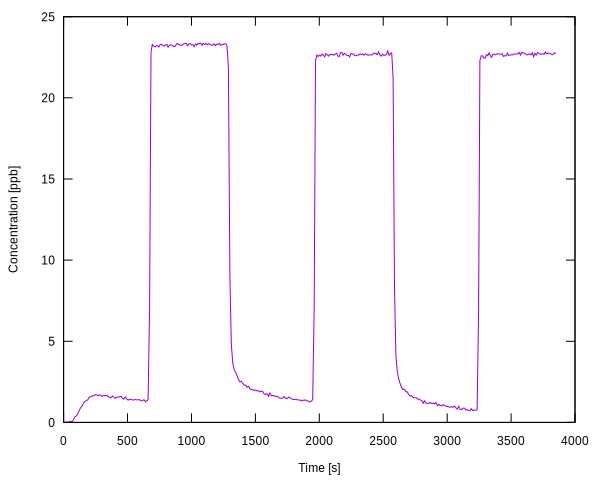

In [9]:


Plot.new(
  [ts[:s, :no2], using: "2:3", with: "lines", title: ""],
  xlabel: "Time [s]",
  ylabel: "Concentration [ppb]"
  )

In [10]:
ts.index = Index.new((0..(ts.nrows - 1)).to_a)

ts.each_row_with_index do |row,i|
  if i+1 < ts.nrows and (row[:no2] - ts.row[i+1][:no2]).abs > 5
    puts i
    puts row[:no2]
  end 
end
nil

57
1.40661245673469
58
7.1470048838478
118
21.9113429464731
175
1.4026561426544
176
7.16016032851427
236
21.2420680410806
294
0.793757618415012
295
6.90272901989557


In [11]:
ts_fit = ts.row[118..174]
offset = ts_fit[:s].first
ts_fit[:s] = ts_fit[:s] - offset
ts_fit.head

,chocho,chocho_err,h2o,h2o_err,index,no2,no2_err,o3,o3_err,timestamp,s
118,-0.184813256316828,0.199424381465742,-4644932.78540354,2033792.04509243,60,21.9113429464731,0.146542812038375,1968.09320091728,2523.55313619287,2016-02-22T23:50:20+00:00,0.0
119,-0.037532754534313,0.121852400044538,-4984164.83455155,1241012.30431952,61,9.01151360396663,0.0876976206519547,208.048852331671,1540.45817575874,2016-02-22T23:50:32+00:00,12.0
120,0.0315887881381444,0.0994747350828614,-4405947.64103313,1016438.49225023,62,4.85782481871785,0.0714048339570703,371.19556473841,1261.98284732694,2016-02-22T23:50:43+00:00,23.0
121,0.0243606407417141,0.0960346314990853,-5050727.31231887,980432.943706656,63,3.69026989229291,0.0687662956893075,-403.509775047733,1217.28211341062,2016-02-22T23:50:54+00:00,34.0
122,0.194423991501392,0.0990936512434588,-4387322.39233526,1016000.10400324,64,3.24102746017985,0.0712180472765308,575.791302377286,1261.64853150636,2016-02-22T23:51:05+00:00,44.99999999999977
123,-0.00971773194892729,0.0996633868869059,-4811467.66522105,1020139.46780015,65,3.09960861086158,0.0714944775109709,28.7733147682779,1266.71458301459,2016-02-22T23:51:16+00:00,56.0
124,-0.144515835265107,0.0981700981936026,-3692273.46166172,1003804.92106141,66,2.86127453489083,0.07032702392086,-759.139959158255,1246.39826089628,2016-02-22T23:51:28+00:00,67.99999999999977
125,0.00063103424090485,0.0929433159722743,-4163951.75117686,948483.755127229,67,2.62245802348067,0.066429616366131,259.678075794456,1177.63335385919,2016-02-22T23:51:39+00:00,79.0
126,0.00670789097557085,0.104495591452565,-4612129.92727772,1066366.74786199,68,2.49739913375695,0.0746733099906438,-149.355040594373,1324.00845063793,2016-02-22T23:51:50+00:00,89.99999999999977
127,-0.049208928927635,0.0976742054309292,-4255632.41148101,997514.147672704,69,2.53436344204281,0.0698553297629685,519.361332348718,1238.55354635606,2016-02-22T23:52:01+00:00,101.0


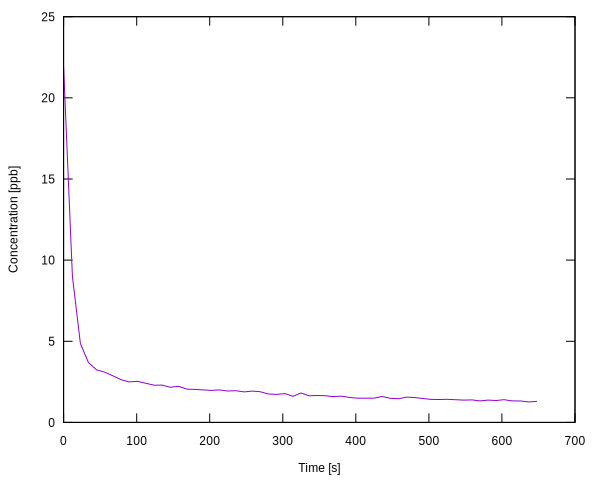

In [12]:
plot_fit = Plot.new(
  [ts_fit[:s, :no2], using: "2:3", with: "lines", title: ""],
  xlabel: "Time [s]",
  ylabel: "Concentration [ppb]")

In [13]:
fit = fit(ts_fit[:s,:no2], function: "a + c*x + b*exp(-x/t)", initials: {a: 1, b: 25, t: 60*10, c: -0.001}, using: "2:3")
fit[:formula_ds].data

" 2.58701 + -0.00229511*x + 19.2802*exp(-x/11.1902) "

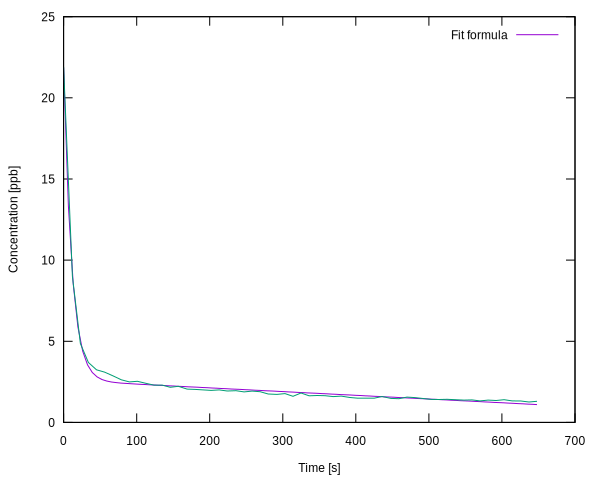

In [14]:
plot_fit << fit[:formula_ds]

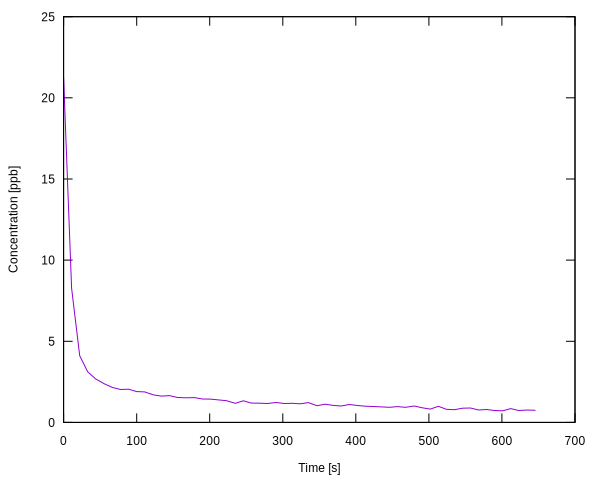

In [15]:
ts_fit2 = ts.row[236..293]
ts_fit2[:s] = ts_fit2[:s] - ts_fit2[:s].first
plot_fit2 = Plot.new(
  [ts_fit2[:s, :no2], using: "2:3", with: "lines", title: ""],
  xlabel: "Time [s]",
  ylabel: "Concentration [ppb]")

In [16]:
fit2= fit(ts_fit2[:s,:no2], function: "a + c*x + b*exp(-x/t)", initials: {a: 1, b: 25, t: 60*10, c: -0.001}, using: "2:3")
fit2[:formula_ds].data

" 2.00988 + -0.00226539*x + 19.1744*exp(-x/10.1774) "

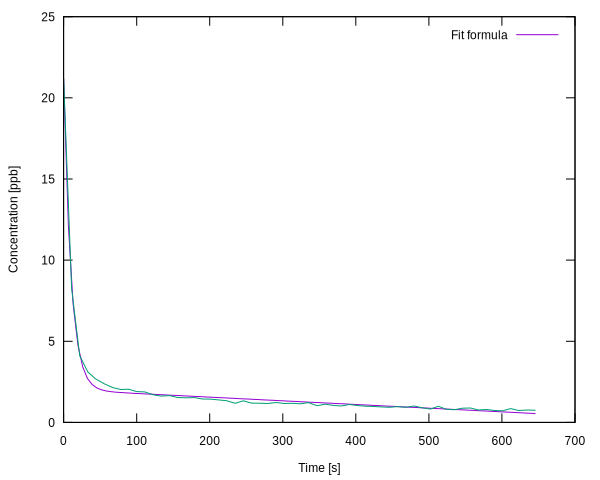

In [17]:
plot_fit2 << fit2[:formula_ds]

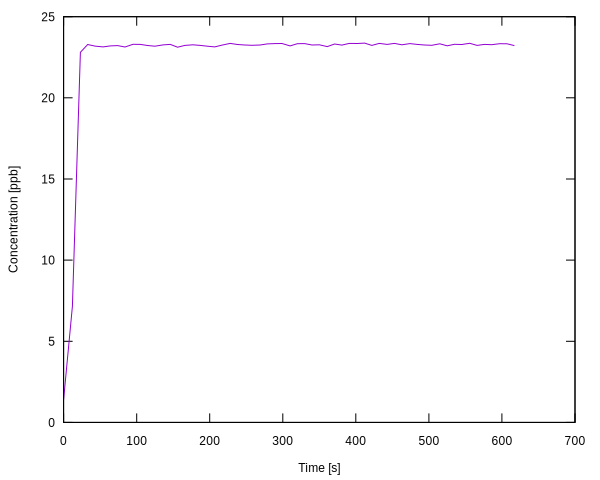

In [18]:
ts_fit3 = ts.row[57..117]
ts_fit3[:s] -= ts_fit3[:s].first
plot_fit3 = Plot.new(
  [ts_fit3[:s, :no2], using: "2:3", with: "lines", title: ""],
  xlabel: "Time [s]",
  ylabel: "Concentration [ppb]")

In [19]:
fit3 = fit(ts_fit3[:s,:no2], function: "a + b*exp(-x/t)", initials: {a: 24, b: -23, t: 10}, using: "2:3")
fit3[:formula_ds].data

" 23.3464 + -23.3601*exp(-x/14.5618) "

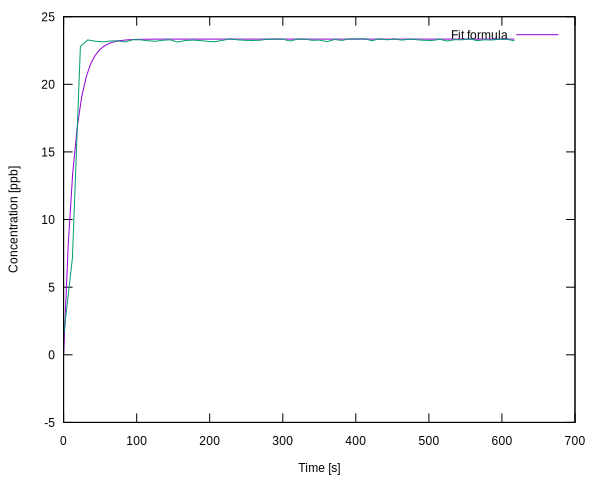

In [20]:
plot_fit3 << fit3[:formula_ds]

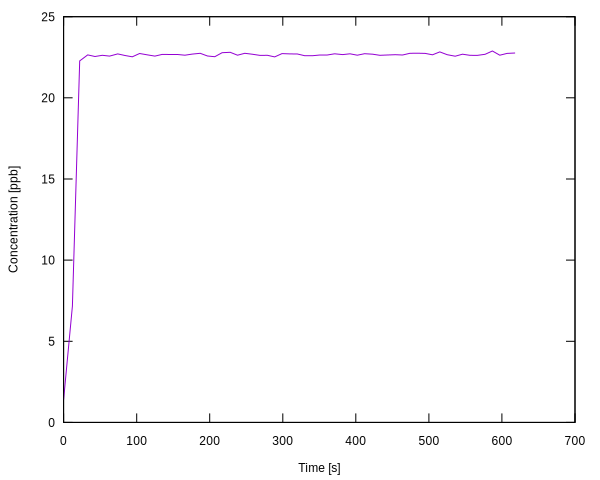

In [21]:
ts_fit4 = ts.row[175..235]
ts_fit4[:s] -= ts_fit4[:s].first
plot_fit4 = Plot.new(
  [ts_fit4[:s, :no2], using: "2:3", with: "lines", title: ""],
  xlabel: "Time [s]",
  ylabel: "Concentration [ppb]")

In [22]:
fit4 = fit(ts_fit4[:s,:no2], function: "a + b*exp(-x/t)", initials: {a: 24, b: -23, t: 10}, using: "2:3")
fit4[:formula_ds].data

" 22.7402 + -22.6455*exp(-x/14.2502) "

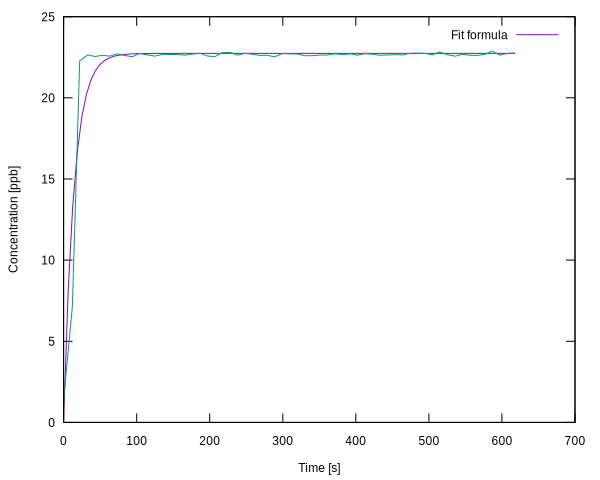

In [23]:
plot_fit4 << fit4[:formula_ds]

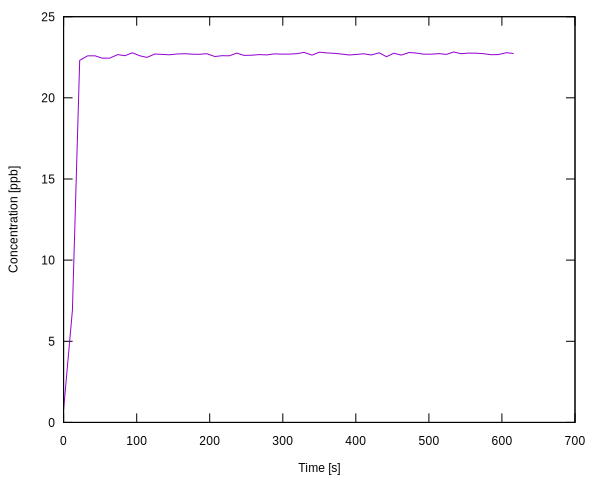

In [33]:
ts_fit5 = ts.row[294..(ts.nrows - 1)]
ts_fit5[:s] -= ts_fit5[:s].first
plot_fit5 = Plot.new(
  [ts_fit5[:s, :no2], using: "2:3", with: "lines", title: ""],
  xlabel: "Time [s]",
  ylabel: "Concentration [ppb]")

In [34]:
fit5 = fit(ts_fit5[:s,:no2], function: "a + b*exp(-x/t)", initials: {a: 24, b: -23, t: 10}, using: "2:3")
fit5[:formula_ds].data

" 22.7553 + -23.2623*exp(-x/14.2057) "

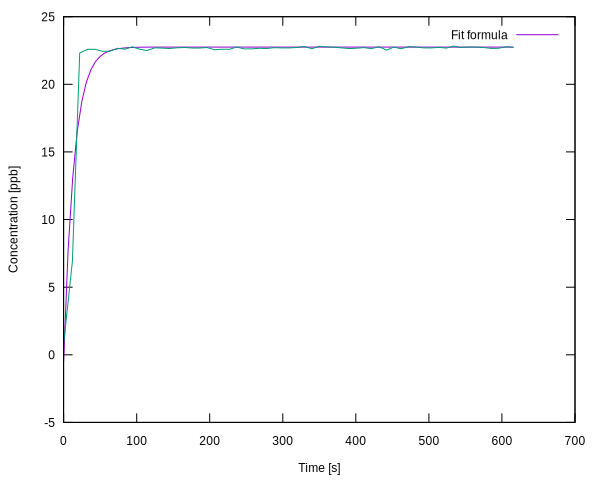

In [35]:
plot_fit5 << fit5[:formula_ds]

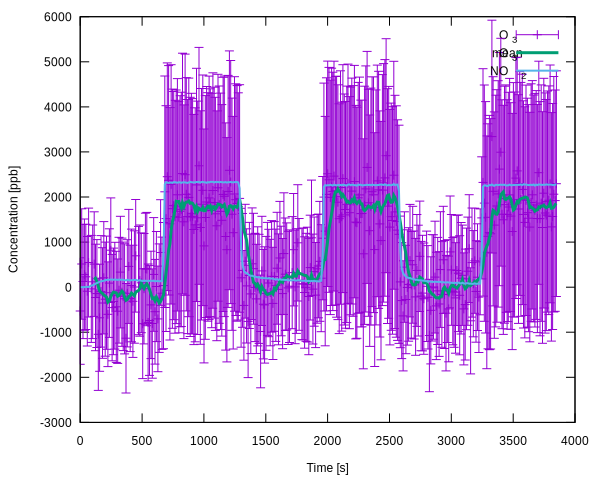

In [37]:
ts[:o3_mean] = ts[:o3].rolling_mean
ts[:no2_scaled] = ts[:no2]*100
Plot.new(
  [ts[:s, :o3, :o3_err], using: "2:3:4", with: "yerrorbars", title: "O_3"],
  [ts[:s, :o3_mean], using: "2:3", with: "lines", title: "O_3 mean", lw: "3"],
  [ts[:s, :no2_scaled], using: "2:3", with: "lines", title: "NO_2", lw: "2"],
  xlabel: "Time [s]",
  ylabel: "Concentration [ppb]"
  )

In [31]:
fit5[:coefficients]

{:a=>22.7402, :b=>-22.6455, :t=>14.2502}

In [36]:
fit5[:deltas]

{:a=>0.1392, :b=>1.023, :t=>1.245}